In [8]:
from daisy import *
import matplotlib.pyplot as plt
import numpy as np

In [15]:
file_path = '/n/groups/htem/ESRF_id16a/tomo_ML/ResolutionEnhancement/jlr54_tests/volumes/'
file_name = 'CBxs_lobV_bottomp100um_30nm_rec_db9_.n5'
in_name = 'volumes/raw'
mask_name = 'volumes/volume_mask'

In [81]:
data = open_ds(file_path+file_name, in_name)
mask = open_ds(file_path+file_name, mask_name)
data.shape

(3216, 3216, 2048)

In [25]:
center_z = data.data_roi.get_center()[2]
slice_size = list(data.data_roi.get_shape())
slice_size[2] = data.voxel_size[2]
slice_roi = Roi((0, 0, center_z), slice_size)
slice_roi

[0:96480, 0:96480, 30720:30750] (96480, 96480, 30)

In [83]:
this_slice = data[slice_roi].to_ndarray().squeeze()

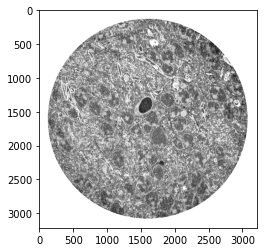

In [84]:
plt.imshow(this_slice * mask.data[:,:,1024].squeeze(), cmap='Greys')

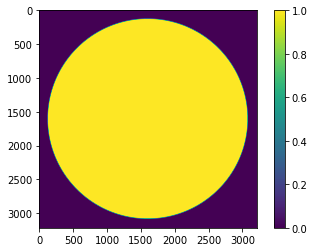

In [82]:
# plt.imshow(mask[slice_roi].to_ndarray().squeeze())
plt.imshow(mask.data[:,:,1024].squeeze())
plt.colorbar()

# Prototyping

In [77]:
from functools import partial
from daisy import *
import numpy as np
from tqdm import tqdm

# --- Parameters and paths --- #
file_path = '/n/groups/htem/ESRF_id16a/tomo_ML/ResolutionEnhancement/jlr54_tests/volumes/'
file_name = 'CBxs_lobV_bottomp100um_30nm_rec_db9_.n5'
in_name = 'volumes/raw'
mask_name = 'volumes/volume_mask'
# below all in voxel units (not world units) *xyz
base_coor = (1603, 1603, 0)
radius = 1475
height = 2048


# --- Connect to image volume and get metadata --- #
print('Loading volume metadata...')
vol = open_ds(file_path + file_name, in_name)


# --- Make mask --- #
print('Making mask volume...')
# defining mask coordinate volume
def in_cylinder(base, radius, height, z, y, x): #assumes simple verticle cylinder
    # determines of point (x,y,z) is contained within cylinder defined by base (in xyz coordinates), radius and height
    return (((x - base[0])**2 + (y - base[1])**2) <= radius**2) * (z >= base[2]) * (z <= (base[2] + height))
        
def in_circle(base, radius, x, y): #assumes simple verticle cylinder
    # determines of point (x,y,z) is contained within cylinder defined by base (in xyz coordinates), radius and height
    return (x - base[0])**2 + (y - base[1])**2 <= radius**2

cylinder_func = partial(in_cylinder, base_coor, radius, height)
slice_func = partial(in_circle, base_coor, radius)

# filling numpy mask
# mask = np.fromfunction(cylinder_func, vol.shape, dtype=np.uint8).astype(np.bool)
# mask = np.empty(vol.shape, dtype=bool) # too avoid memory issues
circle = np.fromfunction(lambda i, j: (i - base_coor[0])**2 + (j - base_coor[1])**2 <= radius**2, vol.shape[:2]).astype(np.bool)
cylinder = np.tile(circle, [height,1,1]).T
cylinder.shape

Loading volume metadata...
Making mask volume...


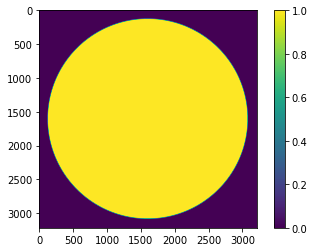

In [78]:
plt.imshow(circle)
plt.colorbar()

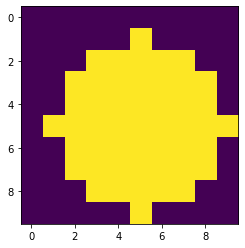

In [70]:
plt.imshow(np.fromfunction(lambda i, j: (i - 5)**2 + (j - 5)**2 <= 4**2, [10,10]))


(3216, 3216, 2048)